In [83]:
import pandas as pd
from sklearn import preprocessing, metrics, svm, tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

le = preprocessing.LabelEncoder()
gnb = GaussianNB()
svm_ovo = svm.SVC(decision_function_shape='ovo')
svm_ovr = svm.SVC(decision_function_shape='ovr')
svm_lin = svm.LinearSVC(max_iter = 5000)
nc = NearestCentroid()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=2021)
rf_bin = RandomForestClassifier(random_state=2021)
lr = LogisticRegression(max_iter=10000, solver='lbfgs')

dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

print(dataset)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

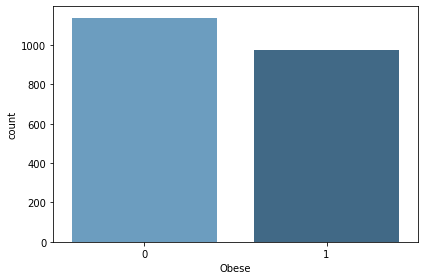

      Gender       Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
0          0  0.148936                               1     0   2.0  3.0     2   
1          0  0.148936                               1     0   3.0  3.0     2   
2          1  0.191489                               1     0   2.0  3.0     2   
3          1  0.276596                               0     0   3.0  3.0     2   
4          1  0.170213                               0     0   2.0  1.0     2   
...      ...       ...                             ...   ...   ...  ...   ...   
2106       0  0.148443                               1     1   3.0  3.0     2   
2107       0  0.169850                               1     1   3.0  3.0     2   
2108       0  0.181362                               1     1   3.0  3.0     2   
2109       0  0.220467                               1     1   3.0  3.0     2   
2110       0  0.205632                               1     1   3.0  3.0     2   

      SMOKE      CH2O  SCC 

In [84]:
#for binary classification
weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}
dataset['Obese'] = dataset_raw['NObeyesdad'].map(weight_map)
sns.countplot(x="Obese",                  
                 palette="Blues_d", 
                 order=dataset['Obese'].value_counts().index,                 
                 data=dataset)
# show figure & plots
plt.tight_layout()
plt.show()

dataset["SCC"] = le.fit_transform(dataset["SCC"])
dataset["SMOKE"] = le.fit_transform(dataset["SMOKE"])
dataset["Gender"] = le.fit_transform(dataset["Gender"]) 
dataset["family_history_with_overweight"] = le.fit_transform(dataset["family_history_with_overweight"])
dataset["FAVC"] = le.fit_transform(dataset["FAVC"])
dataset["NObeyesdad"] = le.fit_transform(dataset["NObeyesdad"])
dataset["CAEC"] = le.fit_transform(dataset["CAEC"])
dataset["CALC"] = le.fit_transform(dataset["CALC"])
dataset["MTRANS"] = le.fit_transform(dataset["MTRANS"])

minVal = min(dataset["Age"]);
maxVal = max(dataset["Age"]);

dataset["Age"] = (dataset["Age"] - minVal) / ( maxVal - minVal )

target = dataset['NObeyesdad']
target_bin = dataset['Obese']

dataset = dataset.drop(['Height', 'Weight', 'NObeyesdad','Obese'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(dataset,target, test_size=0.2,random_state=104)# 80% training and 20% test
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(dataset,target_bin, test_size=0.2,random_state=104)# 80% training and 20% test

print(dataset)
print(dataset.mean())
print(dataset.std())
print(dataset.mode())
print(dataset.skew())


Accuracy RandomForest: 0.8794326241134752
Confusion matrix:
 [[51  4  0  0  0  0  0]
 [ 2 46  1  0  0  1  1]
 [ 0  1 60  2  0  1  3]
 [ 0  2  1 63  0  0  3]
 [ 0  1  0  0 68  0  0]
 [ 0  5  4  2  0 46  2]
 [ 4  3  5  2  0  1 38]]


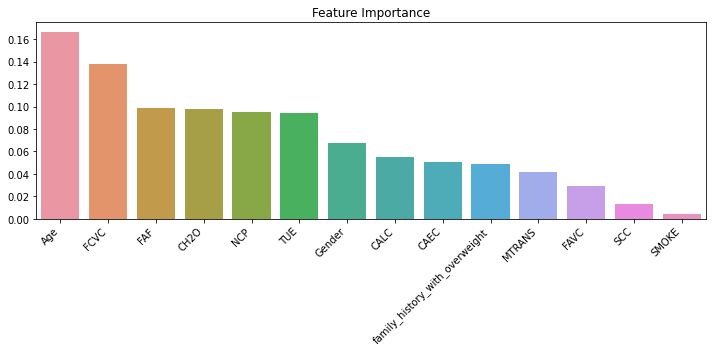

In [86]:
rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test)

print("Accuracy RandomForest:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index=dataset.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [95]:
rf_bin.fit(X_train_bin, y_train_bin) 

y_pred_bin = rf_bin.predict(X_test_bin)

print("Accuracy RandomForest (binary):",accuracy_score(y_test_bin, y_pred_bin))
print("Confusion matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))

Accuracy RandomForest (binary): 0.9408983451536643
Confusion matrix:
 [[205  13]
 [ 12 193]]


In [88]:
gnb.fit(X_train, y_train) 

y_pred = gnb.predict(X_test)

print("Accuracy gnb:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy gnb: 0.5933806146572104
Confusion matrix:
 [[39  1  7  8  0  0  0]
 [31  7  6  2  0  3  2]
 [ 0  2 42 20  0  1  2]
 [ 0  1  0 67  0  0  1]
 [ 1  0  0  0 68  0  0]
 [ 2  5 19 16  0 17  0]
 [ 4  3 11 23  0  1 11]]


In [79]:
svm_ovo.fit(X_train, y_train)

y_pred = svm_ovo.predict(X_test)

print("Accuracy svm_ovo:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy svm_ovo: 0.6903073286052009
Confusion matrix:
 [[47  3  4  1  0  0  0]
 [15 20  3  1  1 10  1]
 [ 1  0 44 13  1  2  6]
 [ 0  2  2 63  0  0  2]
 [ 0  1  0  0 68  0  0]
 [ 2  7 17  9  0 24  0]
 [ 2  4  8 11  1  1 26]]


In [91]:
svm_ovr.fit(X_train, y_train)

y_pred = svm_ovr.predict(X_test)

print("Accuracy svm_ovr:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy svm_ovr: 0.6903073286052009
Confusion matrix:
 [[47  3  4  1  0  0  0]
 [15 20  3  1  1 10  1]
 [ 1  0 44 13  1  2  6]
 [ 0  2  2 63  0  0  2]
 [ 0  1  0  0 68  0  0]
 [ 2  7 17  9  0 24  0]
 [ 2  4  8 11  1  1 26]]


In [ ]:
svm_lin.fit(X_train, y_train)

y_pred = svm_lin.predict(X_test)

print("Accuracy svm_lin:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
nc.fit(X_train, y_train)

y_pred = nc.predict(X_test)

print("Accuracy nc:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [93]:
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy dt:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy dt: 0.7990543735224587
Confusion matrix:
 [[49  3  2  0  0  1  0]
 [ 5 35  2  1  0  3  5]
 [ 0  2 55  2  0  2  6]
 [ 0  1  0 61  0  1  6]
 [ 0  3  0  0 66  0  0]
 [ 3  3  8  1  0 41  3]
 [ 5  7  4  1  0  5 31]]


In [92]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy dt:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy dt: 0.607565011820331
Confusion matrix:
 [[33 13  3  2  0  4  0]
 [20 18  3  1  1  6  2]
 [ 1  0 47 12  0  4  3]
 [ 0  1 10 56  0  0  2]
 [ 1  0  0  0 68  0  0]
 [ 4  5 14 10  0 25  1]
 [ 2  6 22 11  1  1 10]]
